# Importing the libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns


In [3]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import MultiLabelBinarizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Loading the dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
os.getcwd()

'/content'

In [6]:
df_cmu = pd.read_csv('/content/drive/MyDrive/booksummaries.txt', sep='\t', header=None)

In [7]:
df_cmu

,0,1,2,3,4,5,6
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...
...,...,...,...,...,...,...,...
18626,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,NaN,"Prue McKeel, having rescued her brother from ..."
18627,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"{""/m/01jfsb"": ""Thriller"", ""/m/02xlf"": ""Fiction""}",The reader first meets Rapp while he is doing...
18628,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,"{""/m/0xdf"": ""Autobiography""}",The book follows very rough chronological ord...
18629,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,NaN,Colbert addresses topics including Wall Stree...


# Data preprocessing

In [8]:
# rename columns
df_cmu = df_cmu.rename(columns={0:"id_wikipedia", 1:'id_freebase', 2:'title', 3:'author', 4:'pub_date', 5:'genre', 6:'summary'})
df_cmu.head()

,id_wikipedia,id_freebase,title,author,pub_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"{""/m/016lj8"": ""Roman \u00e0 clef"", ""/m/06nbt"":...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"{""/m/06n90"": ""Science Fiction"", ""/m/0l67h"": ""N...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"{""/m/02m4t"": ""Existentialism"", ""/m/02xlf"": ""Fi...",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,NaN,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"{""/m/03lrw"": ""Hard science fiction"", ""/m/06n90...",The novel posits that space around the Milky ...


In [9]:
df_cmu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18631 entries, 0 to 18630
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_wikipedia  18631 non-null  int64 
 1   id_freebase   18631 non-null  object
 2   title         18631 non-null  object
 3   author        16081 non-null  object
 4   pub_date      12376 non-null  object
 5   genre         14612 non-null  object
 6   summary       18630 non-null  object
dtypes: int64(1), object(6)
memory usage: 1019.0+ KB


In [10]:
df_cmu.iloc[1,5]

'{"/m/06n90": "Science Fiction", "/m/0l67h": "Novella", "/m/014dfn": "Speculative fiction", "/m/0c082": "Utopian and dystopian fiction", "/m/06nbt": "Satire", "/m/02xlf": "Fiction"}'

In [11]:
# Converting genre into comma-separated string
def extract_genre(d):
    output = ''
    if pd.isna(d):
        return
    for genre in eval(d).values():
        output = output + genre + ', '
    output = output[:-2]
    return output

#extract_genre(df_cmu['genre'][0])
df_cmu['genre'] = df_cmu['genre'].apply(extract_genre)
df_cmu.head()

,id_wikipedia,id_freebase,title,author,pub_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"Roman à clef, Satire, Children's literature, S...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"Science Fiction, Novella, Speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"Existentialism, Fiction, Absurdist fiction, Novel",The text of The Plague is divided into five p...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,None,The argument of the Enquiry proceeds by a ser...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"Hard science fiction, Science Fiction, Specula...",The novel posits that space around the Milky ...


In [12]:
# Drop books missing genre list
df_cmu = df_cmu[df_cmu['genre'].notna()]
df_cmu.head()

,id_wikipedia,id_freebase,title,author,pub_date,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"Roman à clef, Satire, Children's literature, S...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"Science Fiction, Novella, Speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"Existentialism, Fiction, Absurdist fiction, Novel",The text of The Plague is divided into five p...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"Hard science fiction, Science Fiction, Specula...",The novel posits that space around the Milky ...
5,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"War novel, Roman à clef","The book tells the story of Paul Bäumer, a Ge..."


In [13]:
df_cmu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14612 entries, 0 to 18630
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_wikipedia  14612 non-null  int64 
 1   id_freebase   14612 non-null  object
 2   title         14612 non-null  object
 3   author        13769 non-null  object
 4   pub_date      10993 non-null  object
 5   genre         14612 non-null  object
 6   summary       14612 non-null  object
dtypes: int64(1), object(6)
memory usage: 913.2+ KB


In [14]:
# Generate numeric publication year
df_cmu['pub_year'] = df_cmu['pub_date'].str.slice(0,4).astype('Int32')

In [15]:
# Tag books with the same author & title
df_cmu['dup'] = df_cmu[['title', 'author']].duplicated(keep=False)

df_cmu.loc[(df_cmu['dup']==True) & (pd.isnull(df_cmu['author'])),'dup'] = False

# Concatenate summaries for duplicates of same book
df_cmu.loc[df_cmu['dup']==True, 'summary'] = df_cmu.loc[df_cmu['dup']==True].groupby('title')['summary'].transform("sum")

# Remove 'helper' variables and reorder columns
df_cmu = df_cmu[["id_wikipedia", 'id_freebase', 'title','author', 'pub_year', 'genre', 'summary']]

In [16]:
df_cmu = df_cmu.reset_index(drop=True)
df_cmu['genre'] = df_cmu['genre'].str.strip() # remove leading and trailing spaces
df_cmu['genre'] = df_cmu['genre'].str.lower() # lower case
df_cmu

,id_wikipedia,id_freebase,title,author,pub_year,genre,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945,"roman à clef, satire, children's literature, s...","Old Major, the old boar on the Manor Farm, ca..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"science fiction, novella, speculative fiction,...","Alex, a teenager living in near-future Englan..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"existentialism, fiction, absurdist fiction, novel",The text of The Plague is divided into five p...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,<NA>,"hard science fiction, science fiction, specula...",The novel posits that space around the Milky ...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929,"war novel, roman à clef","The book tells the story of Paul Bäumer, a Ge..."
...,...,...,...,...,...,...,...
14607,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,science fiction,The story starts with former government agent...
14608,36534061,/m/072y44,Remote Control,Andy McNab,1997,"thriller, fiction, suspense",The series follows the character of Nick Ston...
14609,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000,"thriller, fiction",The reader first meets Rapp while he is doing...
14610,37122323,/m/0n5236t,Decoded,Jay-Z,2010,autobiography,The book follows very rough chronological ord...


In [17]:
# df_cmu[df_cmu.duplicated(subset=['title', 'author'], keep=False)] #check duplicates

In [18]:
# df of unique genre

def comma_to_df(s):
  val = s.split(",")
  df_s = pd.DataFrame(val, columns=["genre"])
  return df_s
#comma_to_df(df_cmu["genre"][0])

genre_df = pd.DataFrame()
for g in df_cmu["genre"]:
  genre_df = pd.concat([genre_df, comma_to_df(g)])

In [19]:
genre_df = genre_df.reset_index(drop=True)
genre_df['genre'] = genre_df['genre'].str.strip() # remove leading and trailing spaces
genre_df = pd.DataFrame(genre_df.value_counts()).reset_index() #counts
genre_df.rename(columns= {0:"occurence"}, inplace=True)


In [20]:
genre_mapping = pd.read_excel("/content/genres_mapping_excel.xlsx", sheet_name="genre_mapping")
genre_mapping_dict = {k:v for k, v in zip(genre_mapping["genre"], genre_mapping["new_genre"])}

In [21]:
def clean_labels(row):
    row_labels = row.split(", ")
    final_labels = list()
    for _label in row_labels:
        if _label in genre_mapping_dict:
            final_labels.append(genre_mapping_dict[_label])
    return list(set(final_labels))

df_cmu["filtered_genre"] = df_cmu["genre"].apply(clean_labels)

In [22]:
df_cmu = df_cmu[df_cmu["filtered_genre"].str.len() != 0]
df_cmu.reset_index(inplace=True)

In [23]:

# pre-processing the summary column

def clean_text(text):
    text = text.lower() # lowercase
    text = re.sub(r'[^\w\s]', '', text) # remove punctuation

    tokens = word_tokenize(text) #tokenize

    stop_words = set(stopwords.words('english')) #stop words removal
    filtered_tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer() # lemmatize the tokens
    lemmas = [lemmatizer.lemmatize(token, pos='v') for token in filtered_tokens] # Assuming verbs
    return text

df_cmu["summary"] = df_cmu["summary"].apply(clean_text)

<ipython-input-23-81b792d50aa0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cmu["summary"] = df_cmu["summary"].apply(clean_text)


# Graphs

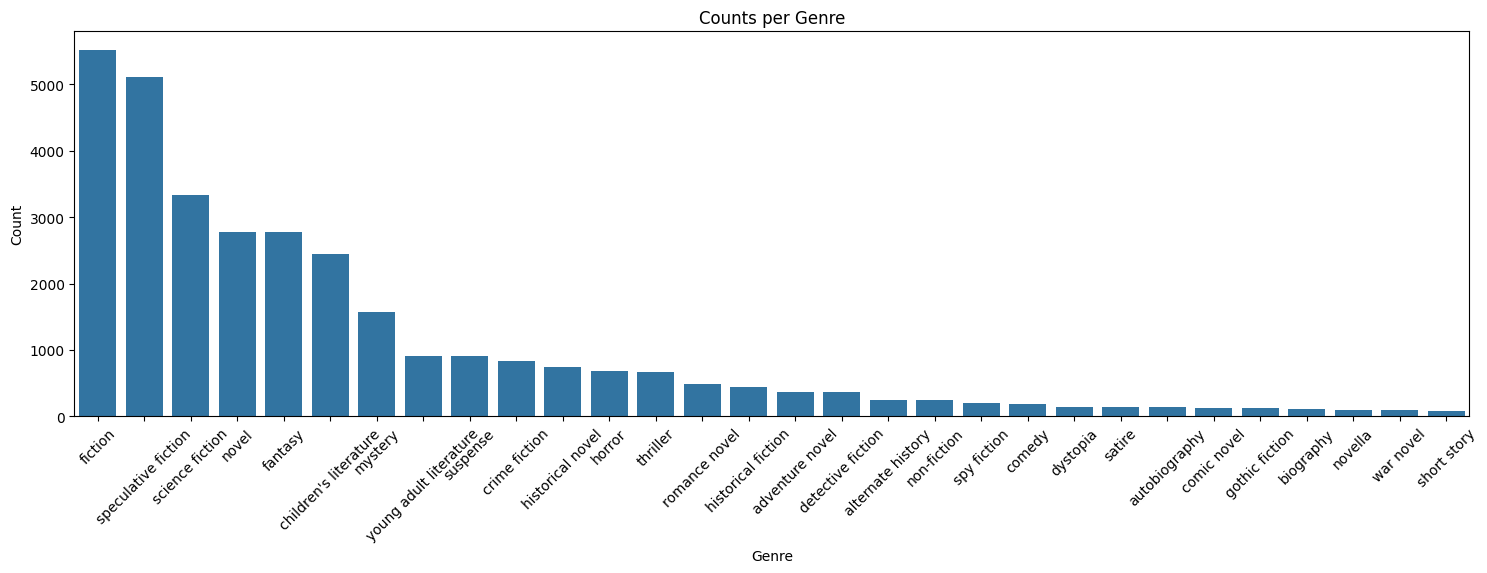

In [24]:
plt.figure(figsize=(18,5))
sns.barplot(x='genre', y='occurence', data=genre_df[:30]) #top 30 genre
plt.title("Counts per Genre")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Split the data and train

In [25]:
# train test split

train, test = train_test_split(df_cmu, random_state=42, test_size=0.33, shuffle=True)
mlb = MultiLabelBinarizer()
X_train = train.summary
X_test = test.summary
y_train = mlb.fit_transform(train.filtered_genre)
y_test = mlb.transform(test.filtered_genre)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(9119,)
(4492,)
(9119, 11)
(4492, 11)


In [26]:
y_train = y_train[:, [4, 6, 10]]
y_test = y_test[:, [4, 6, 10]]

In [27]:
# preproc X_train using W2V

NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words="english")),
                ('clf', OneVsRestClassifier(LogisticRegression())),
            ])

for idx, category in enumerate([4, 6, 10]):
    print('... Processing {}'.format(mlb.classes_[category]))
    NB_pipeline.fit(X_train, y_train[:, idx])
    prediction = NB_pipeline.predict(X_test)
    print(prediction.shape)

    print('Test accuracy is {}'.format(accuracy_score(y_test[:, idx], prediction)))
    print('Test f1 is {}'.format(f1_score(y_test[:, idx], prediction)))

... Processing fiction
(4492,)
Test accuracy is 0.781166518254675
Test f1 is 0.8743448804806341
... Processing literature
(4492,)
Test accuracy is 0.822573463935886
Test f1 is 0.4319315751960085
... Processing thriller
(4492,)
Test accuracy is 0.846393588601959
Test f1 is 0.5921985815602837


In [28]:
# preproc X_train using W2V
from sklearn.ensemble import RandomForestClassifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words="english")),
                ('clf', OneVsRestClassifier(RandomForestClassifier())),
            ])

for idx, category in enumerate([4, 6, 10]):
    print('... Processing {}'.format(mlb.classes_[category]))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, y_train[:, idx])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print(prediction.shape)
    # mask = y_test[][0]
    print('Test accuracy is {}'.format(accuracy_score(y_test[:, idx], prediction)))
    print('Test f1 is {}'.format(f1_score(y_test[:, idx], prediction)))

... Processing fiction
(4492,)
Test accuracy is 0.8007569011576136
Test f1 is 0.8846203429160758
... Processing literature
(4492,)
Test accuracy is 0.8114425645592164
Test f1 is 0.31305758313057586
... Processing thriller
(4492,)
Test accuracy is 0.8492876224398932
Test f1 is 0.6010606953447261
